## 加载数据集Fashion MNIST

In [1]:
# 2.1 加载数据集Fashion MNIST
# 日常用品 服饰 
# 7万张图片
# 10个类别
# 28*28像素
# 用来训练神经网络模型
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
# 训练数据集、测试数据集
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [2]:
# 数据的shape
print(train_images.shape)

(60000, 28, 28)


In [3]:
train_labels.shape

(60000,)

In [4]:
# 第一个图片的对应数据
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

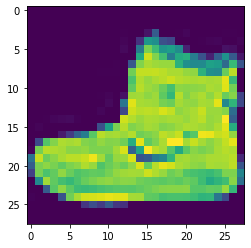

In [5]:
# 第一个图片对应的图像  选自
import matplotlib.pyplot as plt
plt.imshow(train_images[0])


In [6]:
print(train_labels[0])

9


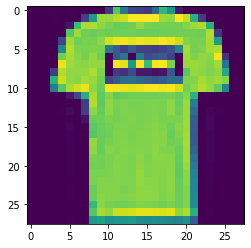

In [7]:
plt.imshow(train_images[1])  # 短袖

## 构造神经网络模型

In [8]:
# 初始化时可直接加层，也可先不加，后加add
model = keras.Sequential()
# 开始加层
# 输入层
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# 中间层 有若干个神经元，每个神经元有3个输入，然后将3个输入与权重相乘
# 激活函数有两种Relu和sotfmax函数  
# Relu函数 x<0 y=0而x>=0是 y=x
# sotfmax函数是将所有的y压缩到[0-1]之间
# 设置28个神经元，同时设置激活函数为relu
model.add(keras.layers.Dense(128,activation=tf.nn.relu))  

# 加层 物体识别的结果有10个，激活函数为softmax
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

In [9]:
# 模型的样子
model.summary()
# 说明
# 100480 为 28*28=784个像素  然后（784个像素 + 1个bias）* 128个神经元 = 100480
# bias为自动加的，相当于截距 每一个层都回加，除了输出层
# 1290 为 （128+1）*10个类别  
# 这种是全连接的神经网络模型

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 训练和评估模型

ppt是这种
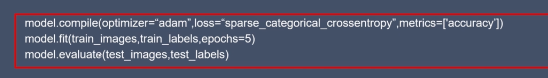

In [10]:
# 优化的方法以及损失函数
# 效果与上方一致 但是下方可有提示
# tf.optimizers.Adam() 优化函数
# tf.losses.sparse_categorical_crossentropy损失函数  因为是类型所以选择这个
#           sparse  为整数解，即什么类别 ，如果为one-hot如【0,0,0,0,1】 则使用tf.losses.categorical_crossentropy
# metrics=['accuracy'] 为训练的时候我们想看到他的精度
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [11]:
model.fit(train_images,train_labels,epochs=5)  # 迭代5次

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4878 - accuracy: 0.6745
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6748 - accuracy: 0.7430
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5769 - accuracy: 0.7935
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5365 - accuracy: 0.8123: 0s - loss: 0.5365 - accuracy: 
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5191 - accuracy: 0.8206


如上，说明，迭代了5次，loss在不断减小，accuracy再不断增加，说明还可以，loss如果出现增加就不好了

In [12]:
train_images = train_images/255 # 变成0-1 会使得loss下降更明显
model.fit(train_images,train_labels,epochs=5)  # 迭代5次

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7022 - accuracy: 0.7507
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4227 - accuracy: 0.8504
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3827 - accuracy: 0.8630
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3570 - accuracy: 0.8710
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3402 - accuracy: 0.8769


测试训练效果-整个模型进行评估

In [13]:
test_images_scaled= test_images/255  # 因为刚才训练的时候归一了
model.evaluate(test_images_scaled,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8633


[0.38390201330184937, 0.8633000254631042]

如上accuracy为0.8616，比训练的accuracy=0.8782 稍差一些，但是不错的

测试训练效果-预测单个图片的类别

In [14]:
model.predict([[test_images[0]/255]])  # test_images/255 保持与训练一样，加两侧括号为了一致  还是报错

ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 28]


In [16]:
model.predict(tf.reshape(test_images[0]/255,(1,28,28)))  # 如下是10个类别的可能性 可以看到最后一个最大

array([[7.6209915e-05, 6.1593269e-08, 2.0707487e-06, 8.7981944e-06,
        1.5828150e-06, 2.0993335e-02, 3.3136169e-04, 6.4823173e-02,
        1.3846651e-03, 9.1237873e-01]], dtype=float32)

In [17]:
model.predict(tf.reshape(test_images[0]/255,(1,28,28))).shape

(1, 10)

In [ ]:
# 具体是什么类型的图片，可以使用numpy.argmax

In [21]:
import numpy as np
print(np.argmax(model.predict(tf.reshape(test_images[0]/255,(1,28,28)))))  # 猜测的类别
print(test_labels[0])  # 实际的类别

9
9


如上预测出来的和实际的标签值是一致的，很好

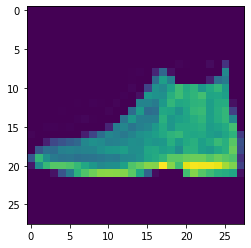

In [22]:
# 打印出来图片
import matplotlib.pyplot as plt
plt.imshow(test_images[0])  # 为靴子

## 自动终止
神经网络会出现过拟合情况，查看loss

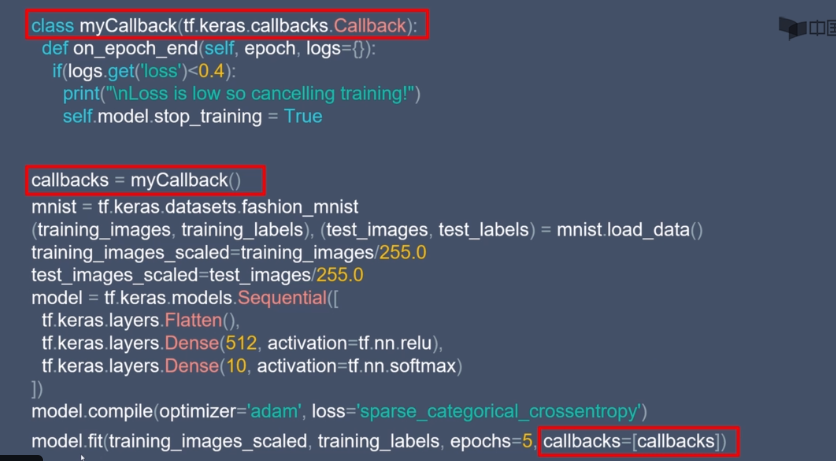

需要自己定义一个类用来停止

In [37]:
class myCallback(tf. keras. callbacks. Callback): 
    def on_epoch_end(self, epoch,logs={}):
        if(logs.get('loss')<0.5): 
            print("\ nLoss is low so cancelling trainingl")
            self.model.top_training=True 

callbacks=myCallback()

In [38]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
# 训练数据集、测试数据集
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(512,activation=tf.nn.relu)) 
model.add(keras.layers.Dense(10,activation=tf.nn.softmax)) 
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 4.0550 - accuracy: 0.7624
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5347 - accuracy: 0.8199
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5051 - accuracy: 0.8300
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5004 - accuracy: 0.8340
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4811 - accuracy: 0.8424
